In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [1]:
def create_random_matrix(rows, cols):
    return np.random.randint(0, 100, size=(rows, cols))

def euclidean_distance(point1, point2):
    squared_distance = sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2))
    return math.sqrt(squared_distance)

def k_nearest_neighbors(data, query, k, distance_metric):
    distances = [(distance_metric(query, point), point) for point in data]
    distances.sort()
    return distances[:k]

In [26]:
matrix = create_random_matrix(9, 2)
print("Случайная матрица:")
print(matrix)
query_point = np.array([0, 0])
k = 3
print(f"{k} ближайших соседа для точки {query_point}:")
print(k_nearest_neighbors(matrix, query_point, k, euclidean_distance))


Случайная матрица:
[[92 82]
 [27  5]
 [41 41]
 [18 28]
 [92 21]
 [10 71]
 [43 52]
 [97 31]
 [79 66]]
3 ближайших соседа для точки [0 0]:
[(27.459060435491963, array([27,  5])), (33.28663395418648, array([18, 28])), (57.982756057296896, array([41, 41]))]


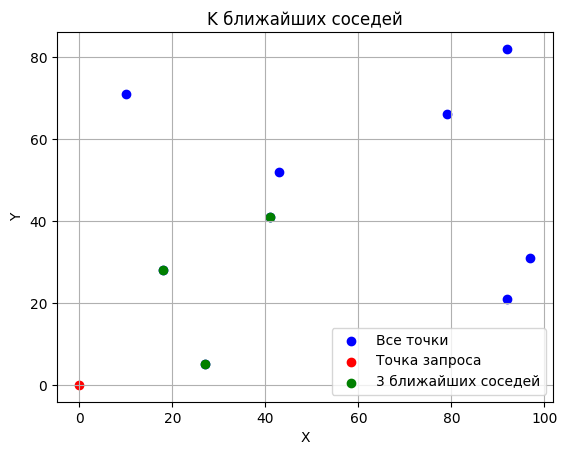

In [27]:
plt.scatter(matrix[:, 0], matrix[:, 1], color='blue', label='Все точки')
plt.scatter(query_point[0], query_point[1], color='red', label='Точка запроса')

# Отмечаем ближайших соседей
# Отмечаем ближайших соседей
nearest_neighbors = k_nearest_neighbors(matrix, query_point, k, euclidean_distance)
neighbors_coords = [point for _, point in nearest_neighbors]  # Эта строка добавлена
plt.scatter([coord[0] for coord in neighbors_coords], [coord[1] for coord in neighbors_coords], color='green', label=f'{k} ближайших соседей')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('K ближайших соседей')
plt.legend()
plt.grid(True)
plt.show()
